# CAPÍTULO 2

## INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - DISEÑO DE SISTEMAS

Ahora que hemos visto una visión general de los sistemas e ML en el mundo real, podemos pasar a la parte divertida de diseñar realmente un sistema de ML. Para reiterar lo dicho en el primer capítulo, el diseño de sistemas de ML adopta un enfoque sistémico de MLOps, lo que significa que consideraremos un sistema de ML de forma holística para garantizar que *todos los componentes, los requisitos empresarias, la pila de datos, la infraestructura, la implementación, la supervisión, etc*, y sus partes interesadas puedan trabajar juntos para satisfacer los objetivos y requistos especificados.

Comenzaremos el capítulo con una discusión sobre los objetivos. Antes de desarrollar un sistema de ML, debemos entender por qué se necesita este sistema. Si este sistema se construye para una empresa, debe estar impulsado por objetivos empresariales, que deberán traducirse en objetivos de ML para guiar el desarrollo de los modelos de ML.

Una vez que todo el mundo esté de acuerdo con los objetivos de nuestro sistema de ML, tendremos que establecer algunos requisitos para guiar el desarrollo de este sistema. En este libro, consideraremos los cuatro requisitos: *fiabilidad, escalabilidad, mantenibilidad y adaptabilidad*. A continuación, pesentaremos el proceso iterativo para diseñar sistemas que cumplan dichos requisitos.

Tal vez se pregunta: con todos estos objetivos, requisito y procesos, ¿ya puedo empezar a construir mi modelo de ML? No tan pronto. Antes de utilizar algoritmos de ML para resolver su problema, primero necesita enmarcar su problema en una atrea que ML pueda resolver. Continuaremos esta capítulo con cómo enmarcar sus problemas de ML. La dificultad de su trabajo puede cambiar significativamente dependiendo de cómo enmarque su problema.

Dado que el ML es un enfoque basado en los datos, un libro sobre el diseño de sistemas de ML será un error si no analiza la importancia de los datos en los sistemas de ML. La última parte de este capítulo aborda un debate que ha consumido gran parte de la literatura sobre ML en los últimos años: ¿qué es más importante, los datos o los algoritmos inteligentes?.

Empecemos.

## Objetivos Empresariales y de LD

En primer lugar, debemos considerar los objetivos de los proyectos de ML propuestos. Cuando trabajan en un proyecto de ML, los científicos de datos tienden a preocuparse por los objetivos de ML: las métricas que pueden medir sobre el rendimiento de sus modelos de ML, como la *precisión, la puntuación F1, la latencia de la interferencia, etc.* Les entusiasma la idea de mejorar la precisión de su modelo del 94% al 94,2% y pueden gastar una toneleada de recursos (datos, computación y tiempo de ingeniería) para conseguirlo.

Pero la verdad es que la mayoría de las empresas no les importan las métricas de ML. No les importa aumentar la precisión de un modelo del 94% al 94,2% a menos que mueva alguna métrica de negocio. Un patrón que veo en mucho proyectos de ML de corta duración es que los científicos de datos se centran demasiado en hackear las métricos de ML sin prestar atención a las métricas del negocio. Sus jedes, sin embargo, sólo se preocupan por las métricas de negocio y, después de no ver cómo un proyecto de ML puede ayudar a impulsar sus métricas de negocio, matan los proyectos prematuramente (y posiblemente dejan ir al equipo de científicos de datos involucrados).

Entonces, ¿qué parámetros les importan a las empresas? Aunque la mayoría de las empresas quieren convencer de lo contrario, **el único propósito de las empresas, según el premio Nobel de Economía Milton Friedman, es maximizar los beneficios para los accionistas**.

El objetivo último de cualquier proyecto en una empresa es, por tanto, aumentar los beneficios, ya sea directa o indirectamnte: directamente, `como el aumento de las ventas (tasa de conversión)` y la reducción de costoes; indirectamente, `como una mayor satisfacción de los clientes` y el `aumento del tiempo de permanencia en un sitio web`.

Para que un proyecto de ML tenga éxito dentro de una organización empresarial, es crucial vincular el rendimiento de un sistema de ML al rendimiento general de la empresa. En qué métricas de rendimiento empresarial se supone que debe influir el nuevo sistema de ML, por ejemplo, la cantidad de ingresos por anuncios, el número de usuarios activos mensualmente?



---

<small>

1 Eugene Yan tiene un gran post sobre cómo los científicos de datos pueden entender la intención empresarial y el contexto de los proyectos en los que trabajan.

2 Milton Friedman, "A Friedman Doctrine-The Social Responsibility of Business Is to Increase Its Profits" ("La doctrina Friedman: la responsabilidad social de las empresas es aumentar sus beneficios"). New York Times Magazine, 13 de septiembre de 1970, https://oreil.ly/Fmbem

</small>

---

Imagínese que trabaja para un sitio de comercio electrónico al que le importa el porcentaje de comprar y quiere que su sistema de recomendación pase de la prediccón por lotes a la predicción en línea.

---
<small>

- Prediccón por lotes (batch prediction) --> El modelo predice muchos datos a la vez, en un proceso programado (por ejemplo, cada hora o cada día). Se usa cuando no se necesita respuesta inmediata. Es más eficienre en costo y cómputo. Ejemplo de este tipo de prodicción: calcular cada noche el riesgo de abandono de todos los clientes.

- Predicción en línea (online / real-time prediction) --> El modelo predice datos por datos, en tiempo real, cuando llega una solicitud. Se usa cuando la respuesta debe ser inmediata. Requiere baja latencia y mayor infraestructura. Ejmeplos de este tipo de predicción en línea: Recomendaciones de un productos mientras el usuario navega.

</small>

---


Puede razonar que la predicción en línea permitirá recomendaciones más relevantes para los usuarios en este momento, lo que puede conducir a un mayor porcentaje de compras. Incluso puede hacer un experimento que demuestre que la prediccón en línea puede mejorar la precisión predictiva de su sistema de recomendación en un $X$% y que, históricamente en su sitios, cada porcentaka de aumento en la precisión predictiva del sistema de recomendación ha llevado a un cietto aumetno en el porcentaje de compras.

Uan de las razones por las que la predicción de la tasa de clics en los anuncios y la detección de fraudes se encuentran en los casos de uso más populares para el ML hoy en dís es que es fácil asignar el rendimiento de los modelos de ML a la métricas de negocio: cada aumento en la tasa de clics se traduce en ingresos publicitarios reales, y cada transacción fraudulente detenida se traduce en dinero real ahorrado.

Muchas empresas crean sus propias métricas para asignar métricas empresariales a métricas de ML. Por ejemplo, Netflix mide el rendimiento de su sistema de recomendación mediante el **índice de acptación**: *el número de reproducciones de calidad dividido por el número de recomendaciones que ve un usuario*. Cuanto meyor sea el índice de aceptación, mejor será el sistema de recomendación. Netflix también situó el índice de aceptaión de un sistema de recomendación en el contexto de otras métricas de negocio, como el total de horas de streaming y la tasa de cancelación de siscripciones. Descubrieron que un mayor índice de aceptación también se traduce a un mayor número de horas totales de streaming y en menor índice de calcelación de suscripciones.

El efecto de un proyecto de ML sobre los objetivos empresariales puede ser dificil de razonar. Por ejemplo, un modelos de ML que ofrezca a los clientes soluciones más personalizadas puede hacerles más felices, lo que les hará gastar más dinero en sus servicios. El mismo modelo de ML también puede resolver sus problemas más rápidamente, lo que hace que gasten menos dinero en sus servicios.

Para obtener una respuesta definitiva sobre la cuestión de cómo influyen las métricas de ML en las métricas empresariales, a menudo es necesario realizar experimentos. Muchas empresas lo hacen con experimentos como las **pruebas A/B** y eligen el modelo que conduce a mejores métricas empresariales, independientemente de si este modelo tiene mejores métricas de ML.

---

<small>

3 Trataremos la predicción por lotes y la predicción en línea en el capítulo 7.
4 Ashok Chandrashekar, Fernando Amat, Justin Basilico y Tony Jebara, "Personalización de obras de arte en Netflix". Blog de tecnología de Netflix, 7 de diciembre de 2017, https://oreil.ly/UEDmw.

5 Carlos A. Gómez-Uribe y Neil Hunt, "El sistema de recomendación de Netflix: Algorithms, Business Value, and Innovation", ACM Transactions on Management Information Systems 6, no. 4 (enero de 2016): 13, https://oreil.ly/JkEPB.

</small>

---

Sin embargo, incluso los experimentos más rigurosas pueden no ser suficientes para comprender la relación entre los resultados de un modelo de ML y las métricas empresariales. Imagina que trabajas para una empresa de ciberseguridad que detecta y detiene amenazas de seguridad, y el ML es sólo un componente de su complejo proceso. Se utiliza un modelo de ML para detectar anomalías en el patrón de tráfico. A continuación, estas ano,añóas pasan por un conjunto lógico (por ejemplo, una serie de sentencias el-else) que cateforiza si constituyen amenazas potenciales. REstas amenazas potenciales son revisadas por expertos en seguirdad para determinar si son amenazas reales. Las amenazas reales se someterán a otro proceso diferente destinado a detenerlas. Cuando este proceso no consigue detener una amenaza, puede resultar imposible averiguar si el componente ML tiene algo que ver con ella.

A muchas empresas les gusta decr que utilizan ML en sus sistemas porque el mero hecho de "estar impulsados por IA" ya les ayuda a atraer clientes, independientemente de si la parte de IA realmente hace algo útil.

Al evaluar las soluciones de ML desde el punto de vista empresarial, es importante ser realista en cuento a los beneficios esperados. Debido a todo el revuelo que rodea al ML, generado tanto por los medio de comunicación como por los profesionales con intereses creados en la adopción del ML, algunas empresas pueden tener la idea de que el ML puede transformar mágicamente sus negocios de la noche a la mañana.

Mágicamente: posible. De la noche a la mañana: No.

Hay muchas empresas que han visto los benficios del ML. Por ejemplo, el ML ha ayudado a Google a buscar mejor, vender más anuncios a precios más altos, mejorar la calidad de la traudcción y crear mejores aplicaciones pars Android. Pero estos avances no se han producido de la noche a la mañana. Google lleva décadas invirtiendo en ML.

La rentabilidad de la inversión en ML depende en gran medida del grado de madurez de la adopción. Cuanto más tiempo lleves adoptando ML, más eficiente será tu pipeline, más rápido será tu ciclo de desarrollo, menos tiempo de ingeniería necesitarás y más bajas serán tus facturas de la nube, todo lo cual se traducen mayores retornos. Según una encuesta realizada en 2020 por Algorithmia, entre las empresas más sofisticadas en su adopción de ML (que han tenido modelos en producción durenta mas de cinco años), caso el 75% puede desplegar un modelo en menos de 30 días. Entre las que acaban de empezar con sus proyectos de ML, el 60% tarda más de 30 días en desplegar un modelo (véase la Figura 2-1).

---
<small>

Un Pipeline en ML es una secuencia estructurada y automatizada de pasos que transforma datos crudos en predicciones o decisiones, garantizando reproducibilidad, consistencia y escalabilidad.

Normalmente incluye:
1. Ingesta de Datos: Recopilación desde archivos, bases de datos o APIs.
2. Preprocesamiento: Limpieza, imputación, normalización y codificación.
3. Feature engineering: Creación y selección de variables relevantes.
4. Entrenamiento del modelo: Ajuste de parámetros con datos históricos.
5. Evaluación: Medición del desempeño con métricas definidas.
6. Inferencia (predicción): Generación de resultados para nuevos datos.
7. Despliegue y monitoreo: Uso en producción y control de rendimiento y drift.

Un pipeline encadena y automatiza todo el flujo de ML para que el mismo proceso se ejecute igual en entrenamiento y producción, evitando errores y resultados inconsistentes.

</small>

---

---
<small>
6 Parmy Olson, "Nearly Half of All 'AI Startups' Are Cashing In on Hype", Forbes, 4 de marzo de 2019, https://oreil.ly/w5kOr.

7 "2020 State of Enterprise Machine Learning", Algorithmia, 2020, https://oreil.ly/FlIV1
</small>

---

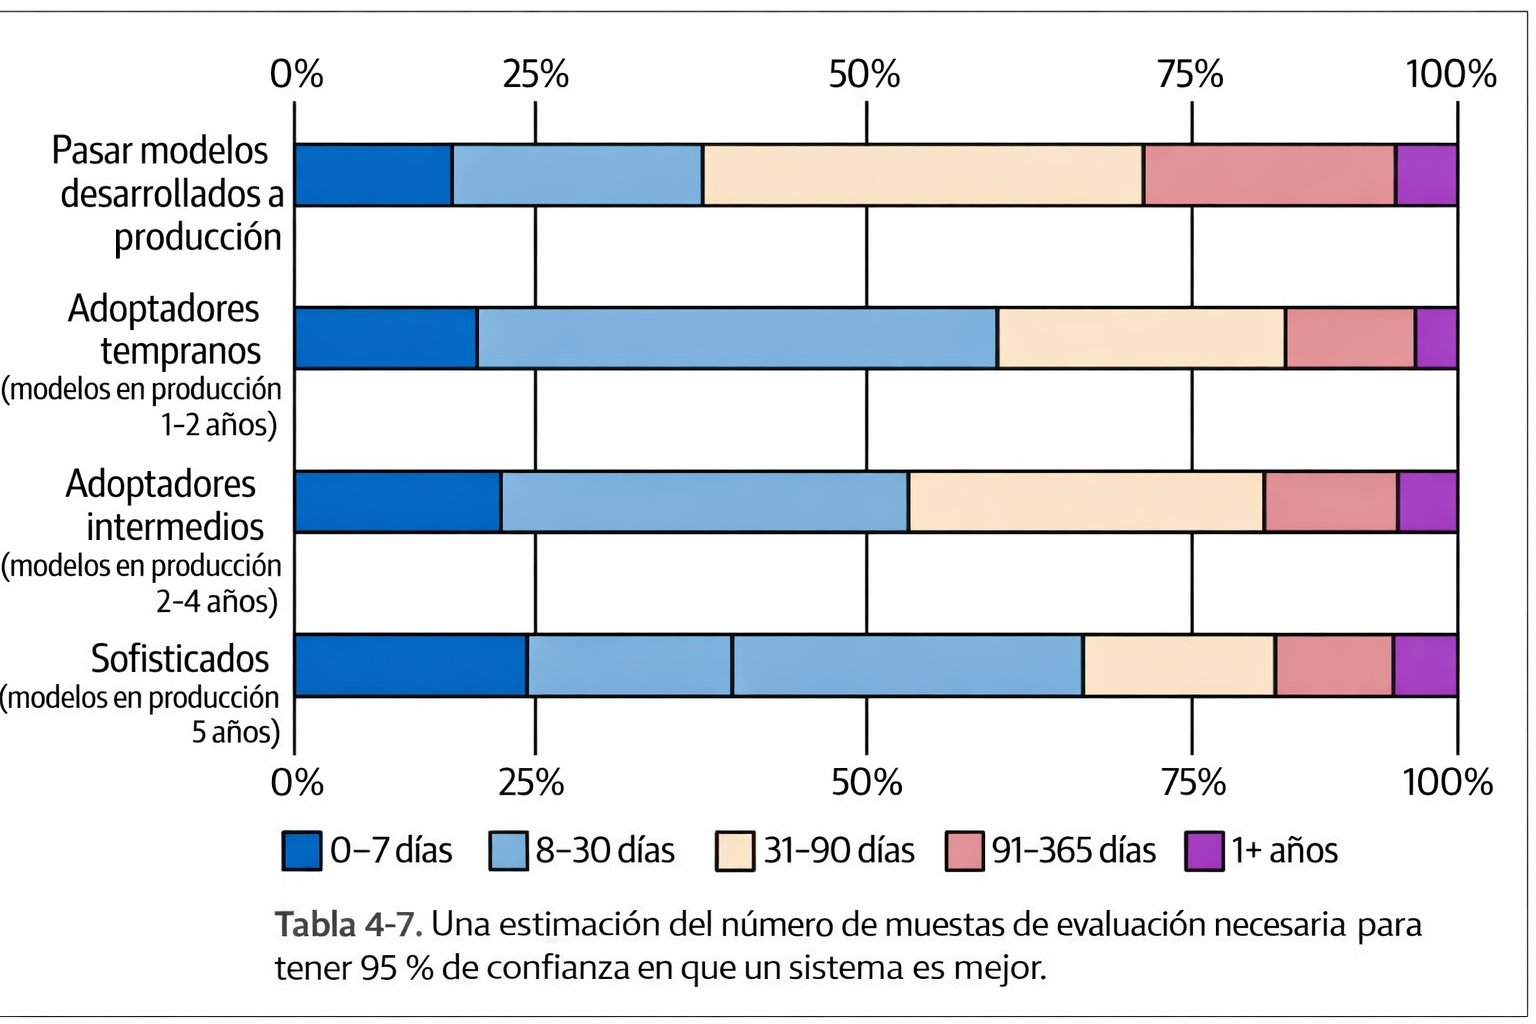

<small>
Figura 2-1. Tiempo que tarda una empresa en poner un modelo en producción. El tiempo que tarda una empresa en poner un modelo en producción es proporcional al tiempo que lleva utilizando el ML. Fuente: Adaptado de una imagen de Algorithmia.
</small>

## Requisitos de los Modelos de ML